ARTIFICIAL NEURAL NETWORK - LAB 


In [11]:
#IMPORTING ALL NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt


print(np.__version__)
print(pd.__version__)
print(tf.__version__)
print(keras.__version__)

1.19.5
1.1.5
2.6.0
2.6.0


PRE-PROCESSING - IMPORTING DATASET , ENCODING FEW COLUMN , FEATURE ENGINEERING ?


In [12]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (3).csv


Create dataframe and check for any null values if it is there then rename

In [13]:
df=pd.read_csv('Churn_Modelling.csv', na_values=["not available","NA"])

Checking shape of our data set

In [14]:
df.shape

(10000, 14)

Printing first 5 rows of our data frame

In [15]:
df.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

Printing last 5 rows of our data frame

In [16]:
df.tail()

RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[5 rows x 14 columns]

Here we drop our "gender" attribute. Because i think it holds no importance in churn_modelling

In [17]:
#df = df.drop(['Gender'], axis=1)

Again Printing first 5 rows of our data frame

In [18]:
#df.head()

Again Printing first 5 rows of our data frame

In [19]:
#df.tail()

Checking shape of our data set after removal of attribute 

In [20]:
#df.shape

Now we seperate our data frame in order to create a machine learning model here, we remove unnecessary attributes which holds no importance

In [21]:
x = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

In [22]:
#x = pd.DataFrame(x)
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [23]:
#y = pd.DataFrame(y)
y

array([1, 0, 1, ..., 1, 1, 0])

LET'S DO ENCODING


1. Label Encoder - if you have 2 categories which may or may not be in order then we you label encoder.
2. One hot encoder - More than a number of categories we use one hot encoding which means that you are converting a value in the row into a column.

  ENCODING CATEGORICAL COLUMN 

In [24]:
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  x[:,2] = le.fit_transform (x[:,2])
  print (x) 

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


Our "Geography" collumn contaions three unique values. so, for encoding we use OneHotEncoder in order to transform our attribute column in three different attribute column



In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer (transformers= [('encoder',  OneHotEncoder(), [1])], remainder = 'passthrough')
x = np.array (ct.fit_transform(x))
print (x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


  TRAIN-TEST SET ( TO TRAIN AND VALIDATE THE MODEL ) 

In [45]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size = 0.1 , random_state = 0)

FEATURE SCALING 

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform (x_train)
x_test = sc.fit_transform (x_test)

BUILD OUR FIRST ANN NETWORK 

In [47]:

ann = tf.keras.models.Sequential()

#Hidden layer 1
ann.add (tf.keras.layers.Dense(units= 8, activation='relu'))

#Hidden layer 2
ann.add (tf.keras.layers.Dense(units= 8, activation='relu'))

#Hidden layer 3
ann.add (tf.keras.layers.Dense(units= 8, activation='relu'))

#Output layer
ann.add (tf.keras.layers.Dense(units= 1, activation='sigmoid'))


In [48]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.09)

In [49]:
ann.compile (optimizer = optimizer, loss= 'binary_crossentropy', metrics = ['accuracy'] )

In [50]:
learn = ann.fit (x_train, y_train, batch_size=64,validation_split=0.20, epochs=100)

Epoch 1/100
113/113 [==============================] - 1s 3ms/step - loss: 0.4382 - accuracy: 0.7936 - val_loss: 0.4179 - val_accuracy: 0.8361
Epoch 2/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8399 - val_loss: 0.3829 - val_accuracy: 0.8494
Epoch 3/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8492 - val_loss: 0.3650 - val_accuracy: 0.8567
Epoch 4/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.8503 - val_loss: 0.3880 - val_accuracy: 0.8406
Epoch 5/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8503 - val_loss: 0.3781 - val_accuracy: 0.8517
Epoch 6/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8500 - val_loss: 0.3652 - val_accuracy: 0.8606
Epoch 7/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8529 - val_loss: 0.3737 - val_accuracy: 0.8600

In [51]:
y_pred = ann.predict (x_test)
y_pred = (y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [52]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[763  31]
 [107  99]]


0.862

ACCURACY CHART 

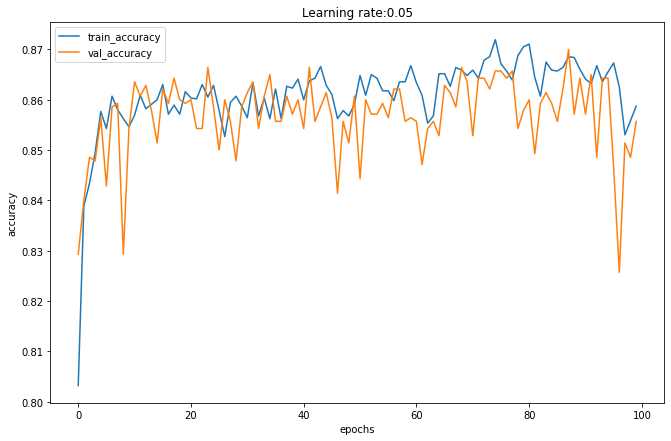

In [62]:
plt.figure(figsize=[11,7])
a = dict(learn.history.items())
plt.plot(a['accuracy'])
plt.plot(a['val_accuracy'])
plt.legend(['train_accuracy','val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title("Learning rate:0.05")
plt.show()

LOSS CHART 



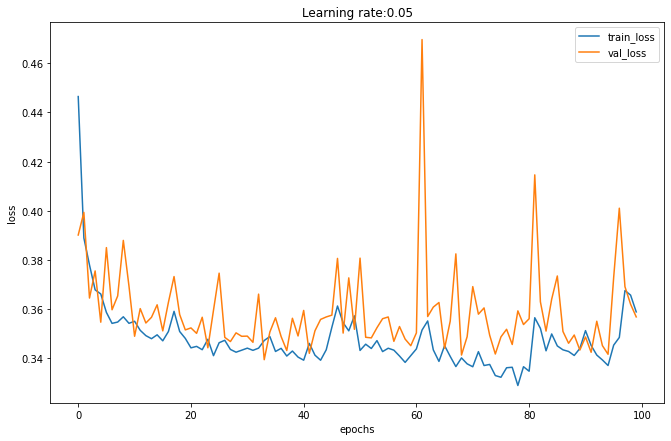

In [63]:
plt.figure(figsize=[11,7])
a = dict(learn.history.items())
plt.plot(a['loss'])
plt.plot(a['val_loss'])
plt.legend(['train_loss','val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("Learning rate:0.05")
plt.show()


**MACHINE LEARNING MODEL**

In [64]:
#importing libraries
import pandas as pd
import numpy as np

IMPORTING DATASET

In [65]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


Create dataframe and check for any null values if it is there then rename

In [66]:
df=pd.read_csv('Churn_Modelling.csv', na_values=["not available","NA"])

Checking shape of our data set

In [67]:
df.shape

(10000, 14)

Printing first 5 rows of our data frame

In [68]:
df.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

Printing last 5 rows of our data frame

In [69]:
df.tail()

RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[5 rows x 14 columns]

Here we drop our "gender" attribute. Because i think it holds no importance in churn_modelling

In [70]:
df = df.drop(['Gender'], axis=1)

Again Printing first 5 rows of our data frame

In [71]:
df.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary  Exited
0          1    15634602  Hargrave  ...               1       101348.88       1
1          2    15647311      Hill  ...               1       112542.58       0
2          3    15619304      Onio  ...               0       113931.57       1
3          4    15701354      Boni  ...               0        93826.63       0
4          5    15737888  Mitchell  ...               1        79084.10       0

[5 rows x 13 columns]

Again Printing first 5 rows of our data frame

In [72]:
df.tail()

RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary  Exited
9995       9996    15606229   Obijiaku  ...               0        96270.64       0
9996       9997    15569892  Johnstone  ...               1       101699.77       0
9997       9998    15584532        Liu  ...               1        42085.58       1
9998       9999    15682355  Sabbatini  ...               0        92888.52       1
9999      10000    15628319     Walker  ...               0        38190.78       0

[5 rows x 13 columns]

Checking shape of our data set after removal of attribute

In [73]:
df.shape

(10000, 13)

Now we seperate our data frame in order to create a machine learning model here, we remove unnecessary attributes which holds no importance

In [74]:
x = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

In [75]:
#x = pd.DataFrame(x)
x

array([[619, 'France', 42, ..., 1, 1, 101348.88],
       [608, 'Spain', 41, ..., 0, 1, 112542.58],
       [502, 'France', 42, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 36, ..., 0, 1, 42085.58],
       [772, 'Germany', 42, ..., 1, 0, 92888.52],
       [792, 'France', 28, ..., 1, 0, 38190.78]], dtype=object)

In [76]:
#y = pd.DataFrame(y)
y

array([1, 0, 1, ..., 1, 1, 0])

LET'S DO ENCODING

Label Encoder - if you have 2 categories which may or may not be in order then we you label encoder. One hot encoder - More than a number of categories we use one hot encoding which means that you are converting a value in the row into a column.

In [ ]:
 #from sklearn.preprocessing import LabelEncoder
  #le = LabelEncoder()
  #x[:,2] = le.fit_transform (x[:,2])
  #print (x) 

Our "Geography" collumn contaions three unique values. so, for encoding we use OneHotEncoder in order to transform our attribute column in three different attribute column

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer (transformers= [('encoder',  OneHotEncoder(), [1])], remainder = 'passthrough')
x = np.array (ct.fit_transform(x))
print (x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


TRAIN-TEST SET ( TO TRAIN AND VALIDATE THE MODEL )

In [78]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size = 0.2 , random_state = 0)

FEATURE SCALING

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform (x_train)
x_test = sc.fit_transform (x_test)

**NOW, WE BUILD OUR FIRST MACHINE LEARNING MODEL (XGBOOST)**

In [80]:
from xgboost import XGBClassifier

In [114]:
classifier = XGBClassifier (learning_rate =0.05, n_estimators =400)

In [115]:
classifier.fit(x_train, y_train, eval_metric= 'logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [116]:
predictions = classifier.predict(x_test)

In [117]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("accuracy_score:" + str(accuracy_score(y_test, predictions)))

accuracy_score:0.867


**NOW, WE BUILD OUR SECOND MACHINE LEARNING MODEL (RANDOM FOREST)**

Here we assign the features (data) to the X variable. And the (target) to the y variable.

In [118]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size = 0.2 , random_state = 0)

Printing shape of our training data and testing data

In [119]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (8000, 11)
Training Labels Shape: (8000,)
Testing Features Shape: (2000, 11)
Testing Labels Shape: (2000,)


Feature Scaling

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform (x_train)
x_test = sc.fit_transform (x_test)

Here we will define number of decision tree we want. And simultaneously Fit our training dataset and then predict testing dataset

In [130]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 300 decision trees
rf = RandomForestRegressor(n_estimators = 300, random_state = 0)

# Train the model on training data
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(y_pred)

[0.25666667 0.1        0.28       ... 0.11       0.48333333 0.30666667]


In [131]:
y_pred = rf.predict (x_test)
y_pred = (y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


And finally we will print our model accuracy, precision, f1-score and confusion matrix



In [132]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1502   93]
 [ 192  213]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.70      0.53      0.60       405

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8575


**NOW, WE BUILD OUR THIRD MACHINE LEARNING MODEL (NAIVE BAYES MODEL)**

Here we split our data set into train and test as x_train, x_test, y_train, and y_test.

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

Here we create a gaussian naive bayes classifier as nv. And we fit the data of x_train,y_train int the classifier model.

In [150]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(x_train,y_train) # fitting the data

GaussianNB(priors=None, var_smoothing=1e-09)

Here we store the prediction data into y_pred. And calculate the accuracy score.


In [151]:
from sklearn.metrics import accuracy_score
y_pred = nv.predict(x_test) # store the prediction data
accuracy_score(y_test,y_pred) # calculate the accuracy

0.7795

***EXPLORATORY DATA ANALYSIS  WITH THE HELP OF PANDAS PROFILING , AUTOVIZ LIBRARY AND SWEETVIZ LIBRARY ***

In [2]:
#IMPORTING ALL NECESSARY LIBRARIES
import numpy as np
import pandas as pd

IMPORTING DATASET


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


Create dataframe and check for any null values if it is there then rename

In [4]:
df=pd.read_csv('Churn_Modelling.csv', na_values=["not available","NA"])

INSTALLING PANDAS-PROFILING LIBRARY FOR EXPLORATORY DATA ANALYSIS

In [154]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     |████████████████████████████████| 34.6 MB 7.8 kB/s 
     |████████████████████████████████| 10.1 MB 69 kB/s 
     |████████████████████████████████| 596 kB 56.2 MB/s 
     |████████████████████████████████| 102 kB 14.7 MB/s 
     |████████████████████████████████| 675 kB 44.5 MB/s 
     |████████████████████████████████| 4.7 MB 29.8 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 812 kB 64.6 MB/s 
     |████████████████████████████████| 28.5 MB 51 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261261 sha256=62507923df653e4645dbee9c78e7df23d3681a36a1b072b44fa31d107f5cf219
  Stored in directory: /tmp/pip-ephem-wheel-cache-oytiw4_q/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=767632632f296df6d2b414fbe415c1ce87824d90b2e40c405b63c5ba3ffcfa39
  Stored in directory: /root

IMPORTING PANDAS PROFILING AND GENERATE EDA REPORT

In [5]:
import pandas_profiling
#Generating PandasProfiling Report
report = pandas_profiling.ProfileReport(df)

PRINTING EDA REPPORT

In [6]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

NOW, WE DO SOME EDA WITH THE HELP OF SWEETVIZ LIBRARY



In [7]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 198 kB/s 


In [8]:
import sweetviz as sv
#Generating Sweetviz report
report = sv.analyze(df)
report.show_html("churn_EDA_report.html") # specify a name for the report

                                             |          | [  0%]   00:00 -> (? left)

Report churn_EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


INSTALLING AUTOVIZ LIBRARY FOR EXPLORATORY DATA ANALYSIS

In [9]:
!pip install autoviz

     |████████████████████████████████| 44 kB 1.7 MB/s 


CREATING REPORT

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (10000, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0

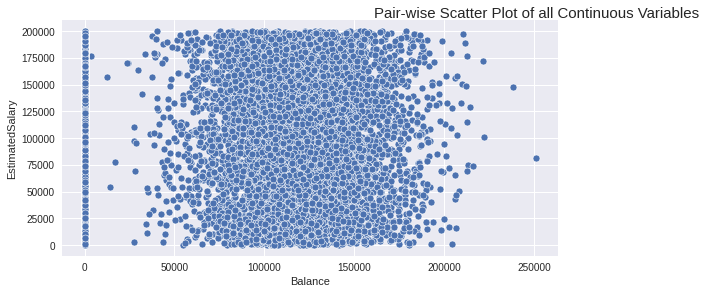

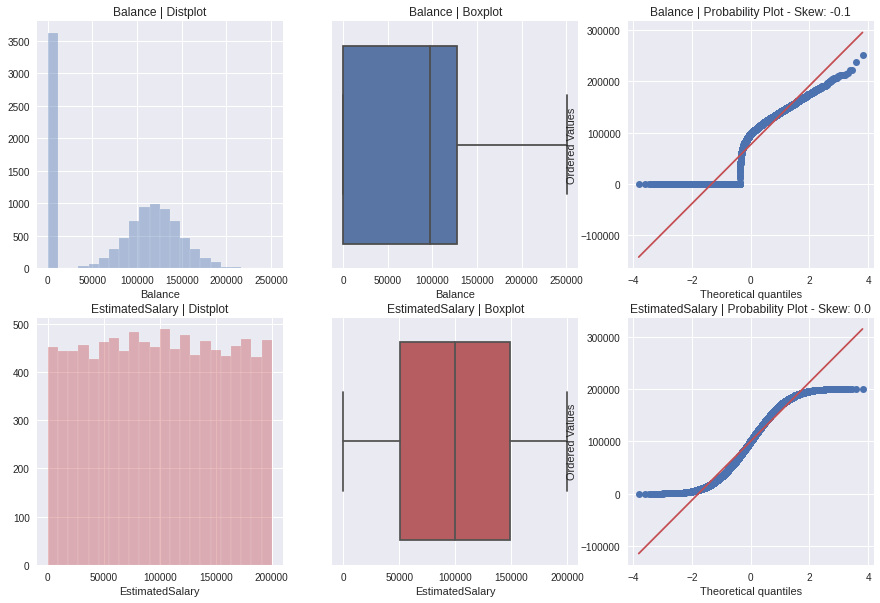

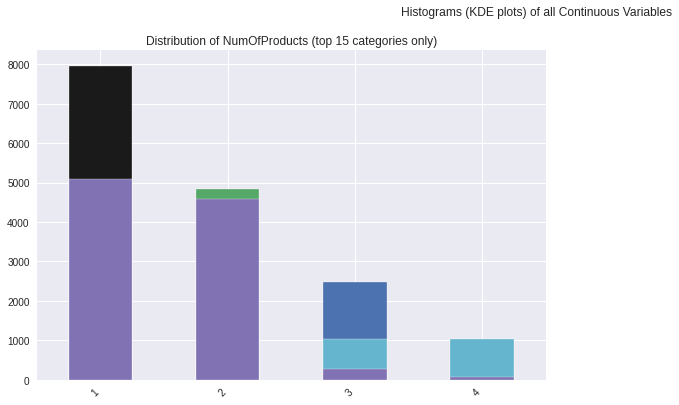

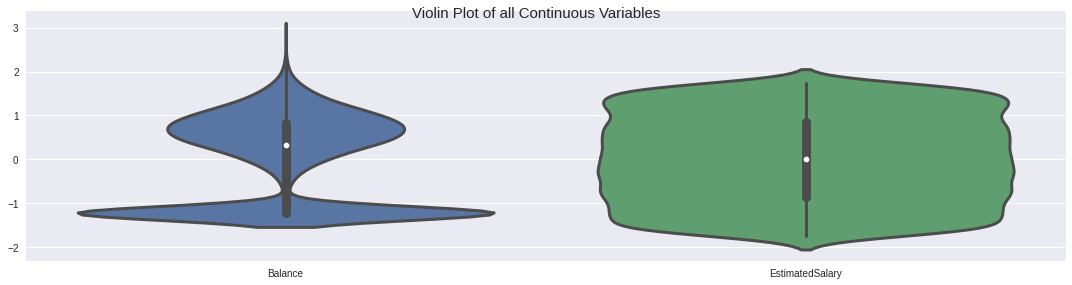

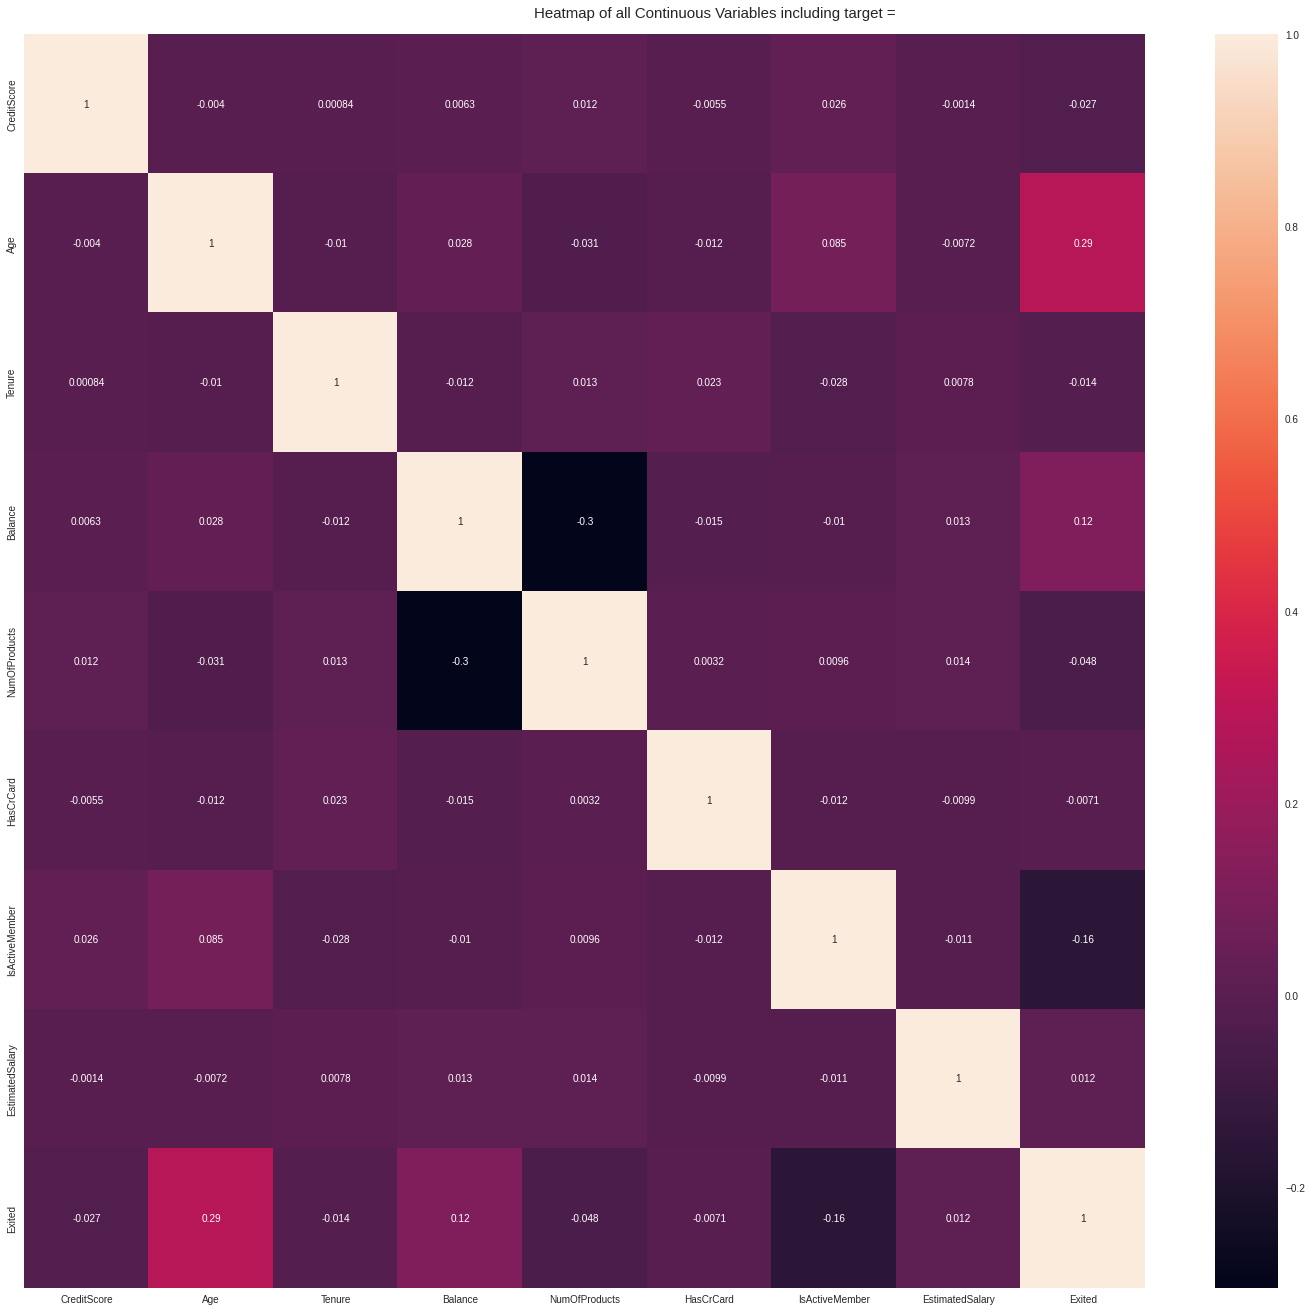

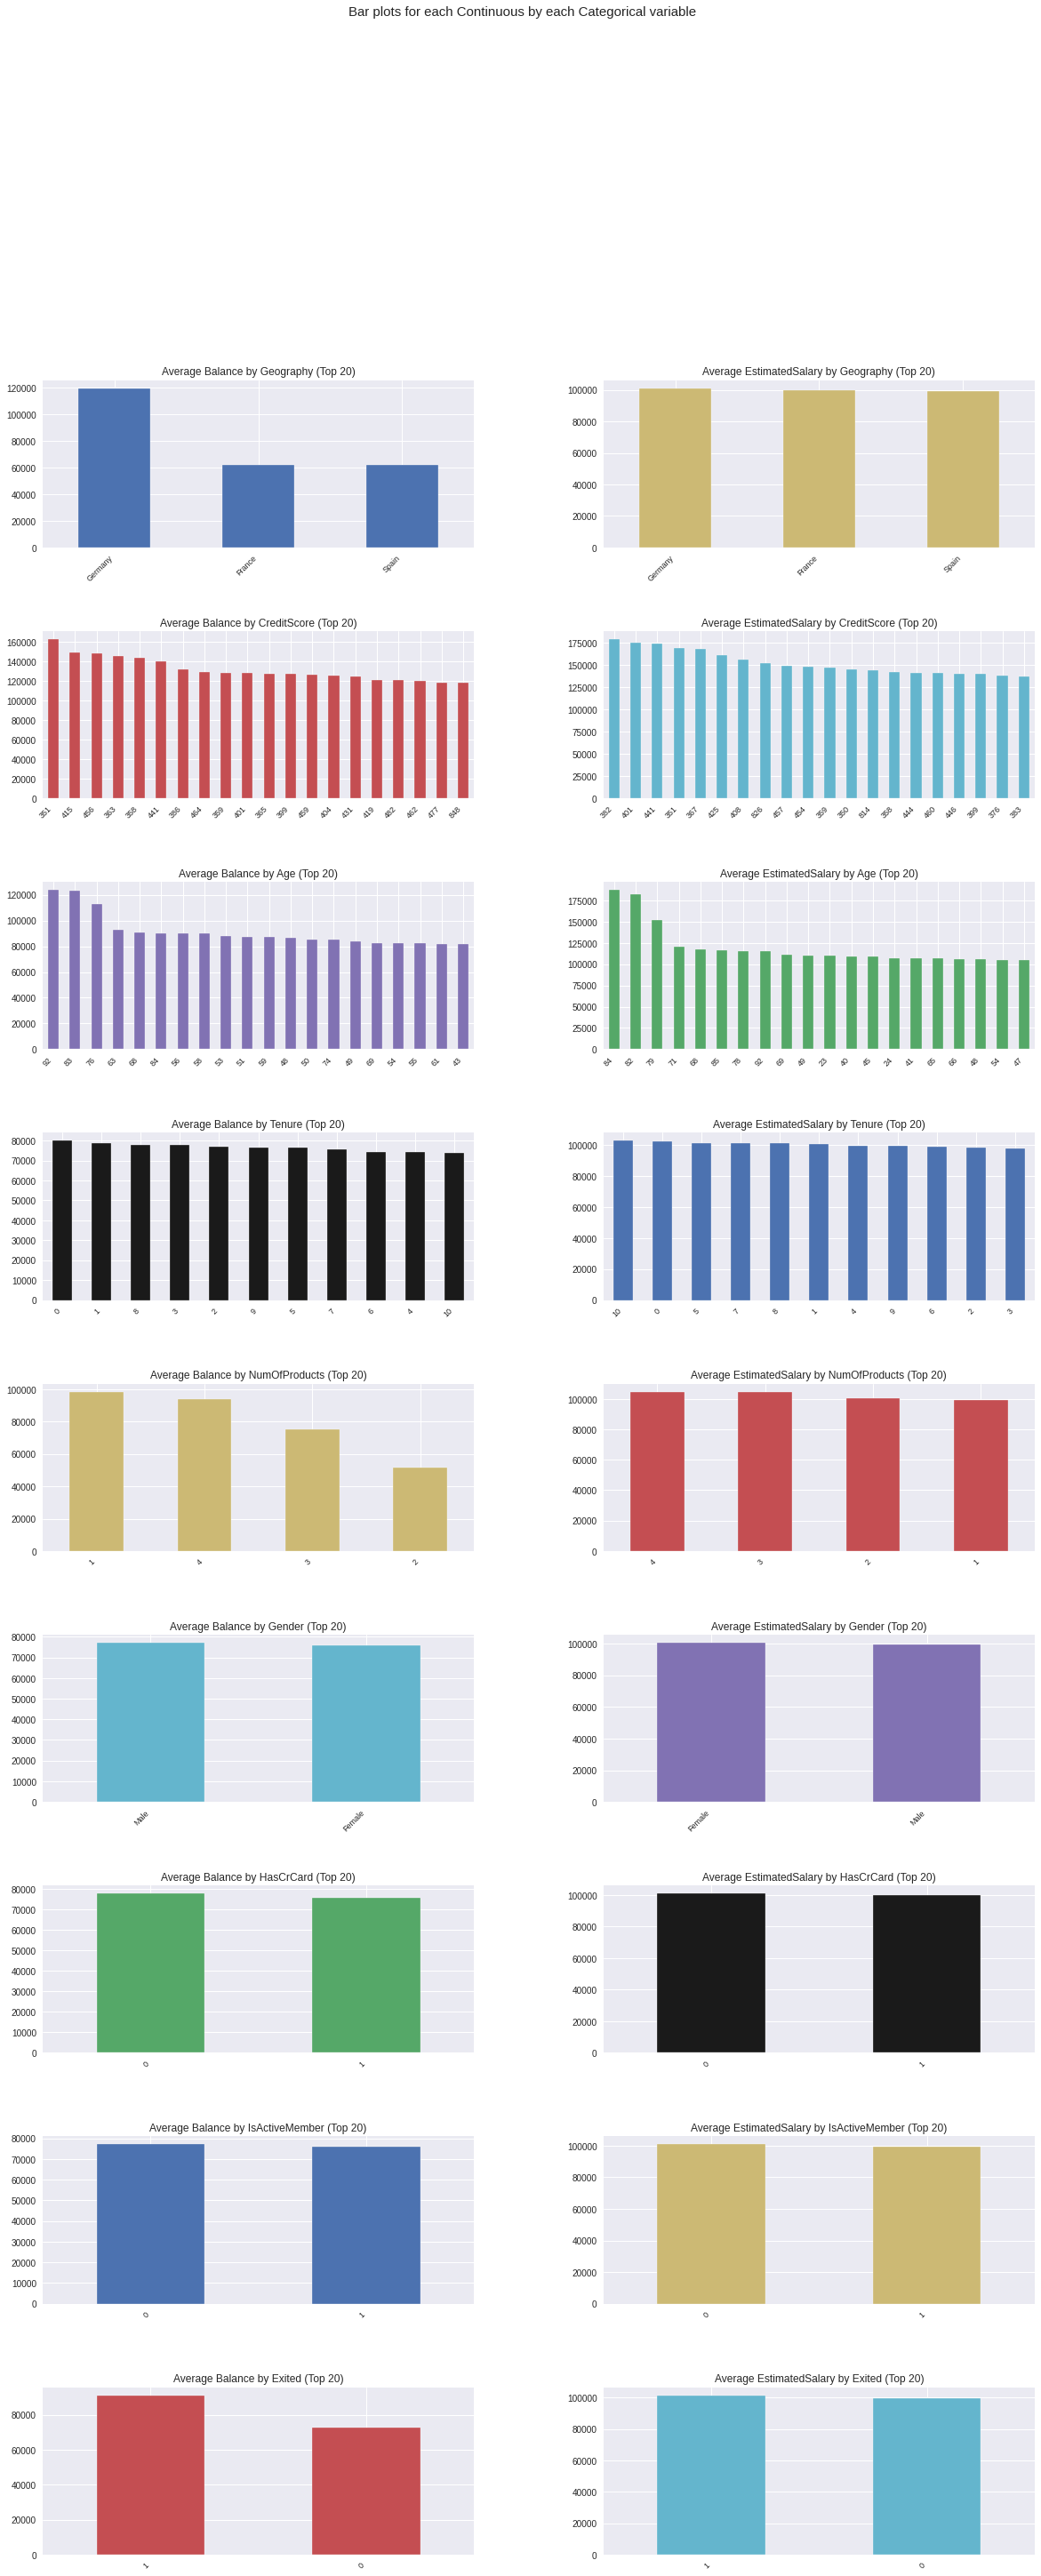

Time to run AutoViz (in seconds) = 7.828

 ###################### VISUALIZATION Completed ########################


In [10]:
# Importing Autoviz class from the autoviz library
from autoviz.AutoViz_Class import AutoViz_Class

#Initialize the Autoviz class in a object called df
df = AutoViz_Class()
# Using churn Dataset and passing to the default parameters
filename = "Churn_Modelling.csv"
sep = ","
graph = df.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

**END OF NOTEBOOK**